In [ ]:
# Primera celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
import numpy as np           #numpy = Numerical Python
import matplotlib.pyplot as plt  #graficos
plt.style.use('bmh')		#estilo
figsize = (12, 5)		#12x5 pulgadas
dpi = 600     #Resolucion de figura

In [ ]:
# segunda celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
g = 9.81 # m/s^2
L = 25   # m
m = 40   # kg

def approx(t, theta0):
    """ para evaluar el resultado analitico aproximado """
    return theta0*np.cos(t*(g/L)**.5)

def RHS(theta, w, dt):
    """ devuelve el lado derecho de la 
    ec. dif. ordinaria (1.6) 
    """
    dw = -np.sin(theta)*dt*g/L
    dtheta = w*dt
    return dtheta, dw

def euler_step(theta, w, dt):
    """ avanza un paso del algoritmo de Euler """
    dtheta, dw = RHS(theta, w, dt)
    w = w + dw
    theta = theta + dtheta
    return theta, w

def euler_method(theta0, w0, dt, n):
    """  Integración por Euler en 0 <= t <= T (intervalo) """
    theta = (n + 1)*[0]
    w = (n + 1)*[0]
    
    theta[0] = theta0
    w[0] = w0
    for i in range(n):
        theta[i + 1], w[i + 1] = euler_step(theta[i], w[i], dt)
    
    return theta, w

In [ ]:
# tercera celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
theta01 = np.pi/12
theta02 = np.pi/3
T = 20
n = 10000
t = np.linspace(0, T, n + 1)
dt = T/float(n)

theta1, w1 = euler_method(theta01, 0, dt, n)
theta2, w2 = euler_method(theta02, 0, dt, n)

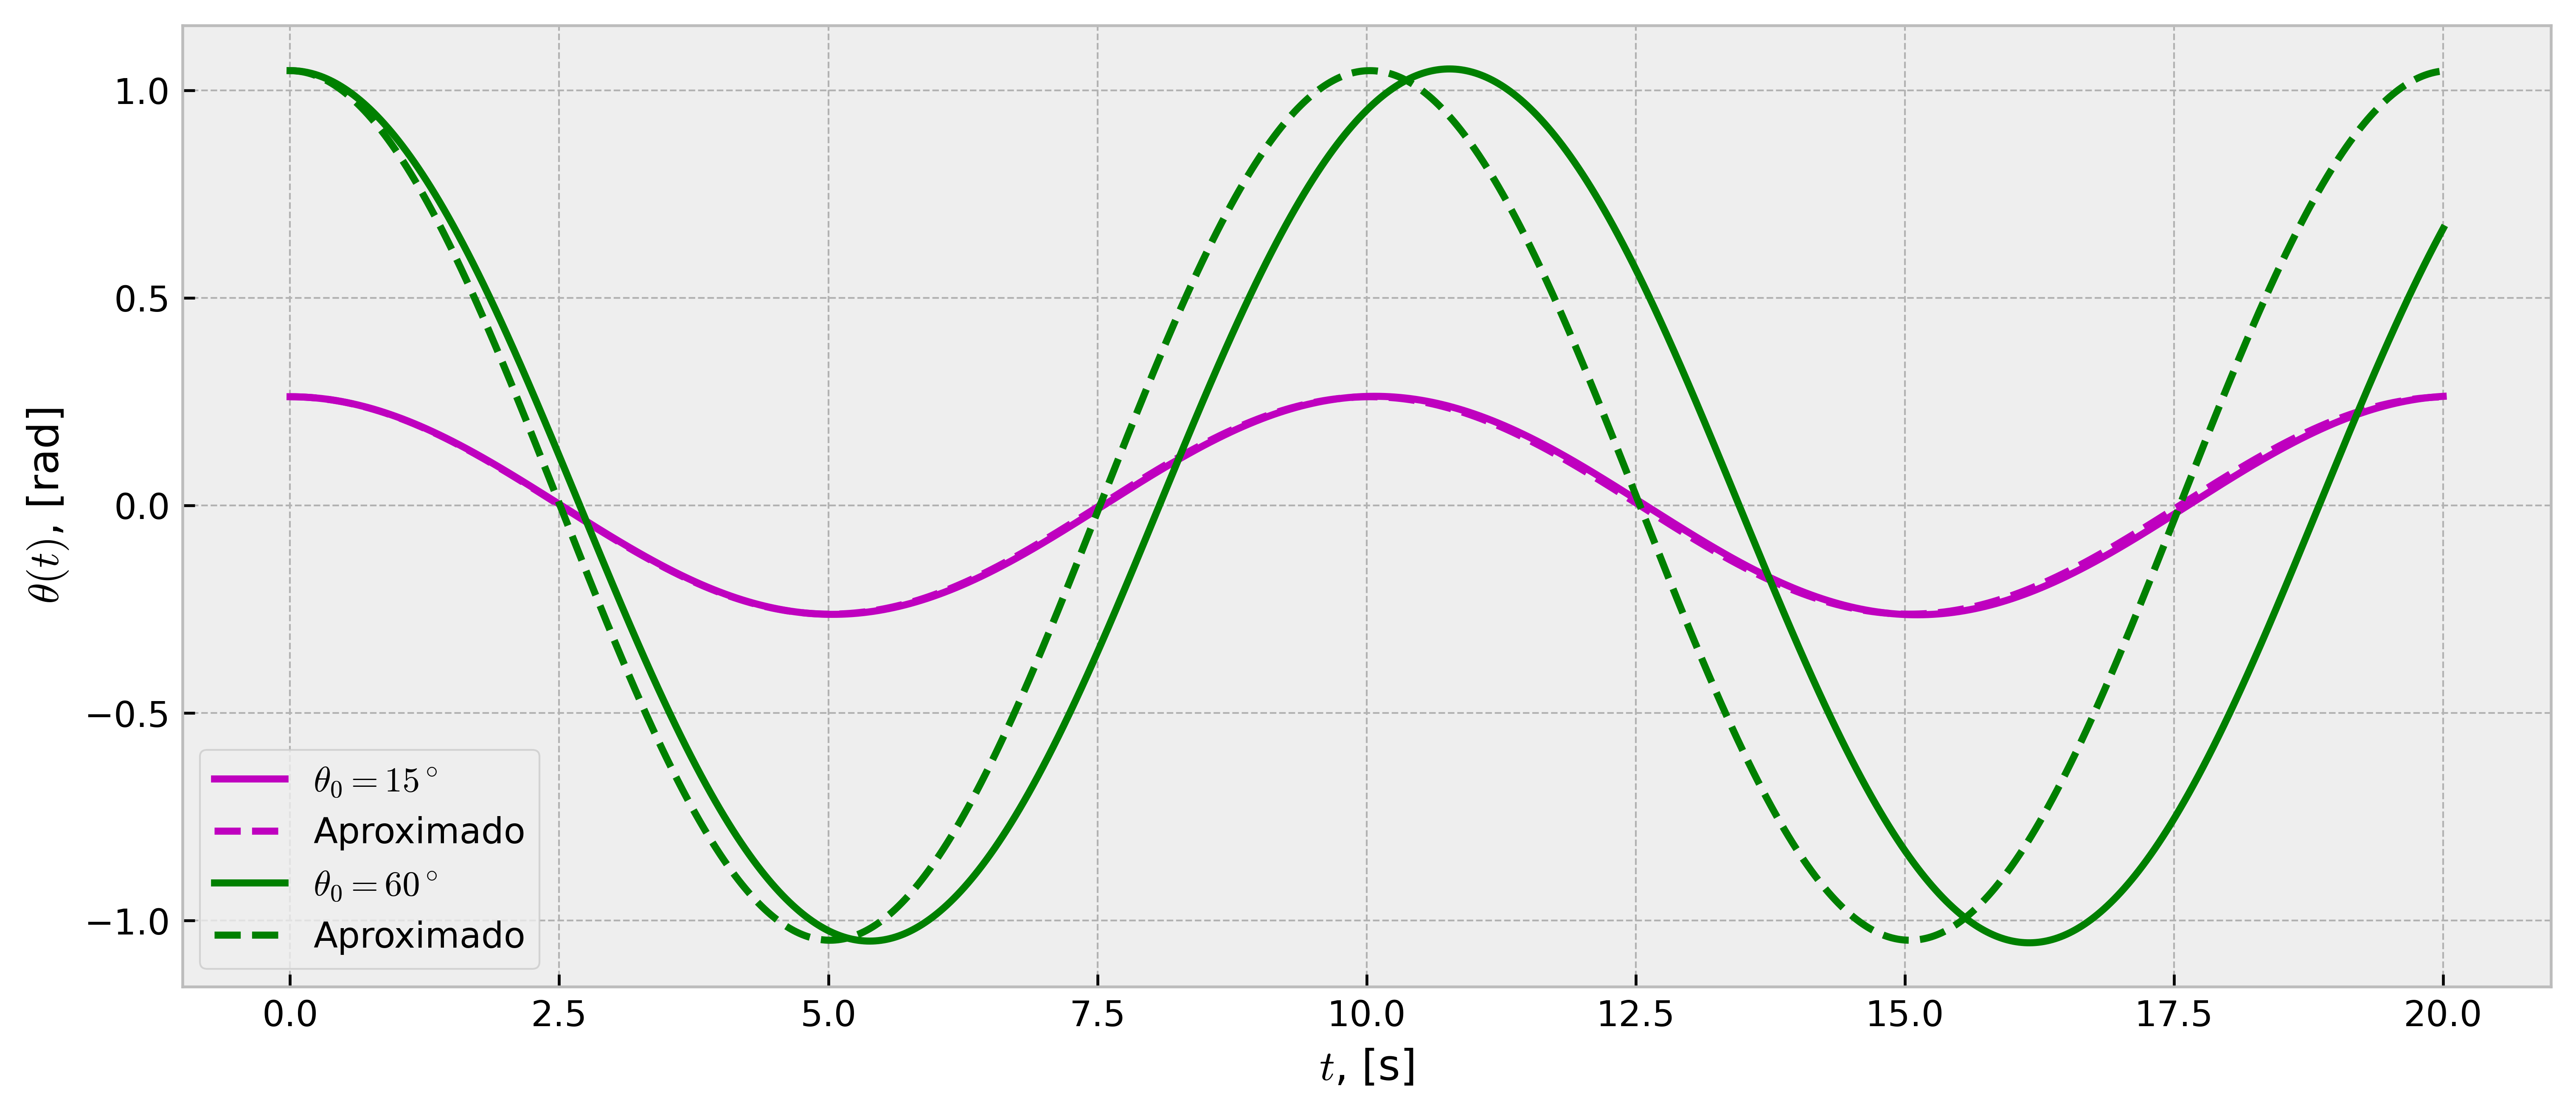

In [ ]:
# cuarta celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
plt.figure(figsize=figsize, dpi=dpi)
plt.plot(t, theta1, "m", label=r"$\theta_0=%.0f^\circ$"%(theta01*180/np.pi))
plt.plot(t, approx(t, theta01), "m--", label=r"Aproximado")
plt.plot(t, theta2, "g", label=r"$\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, approx(t, theta02), "g--", label=r"Aproximado")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.legend()
plt.show()

In [ ]:
# quinta celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
def get_U(theta):
    """ Energia Potencial U """
    return m*g*L*(1 - np.cos(theta))

def get_K(w):
    """ Energia cinetica K """
    return 0.5*m*L**2*np.array(w)**2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

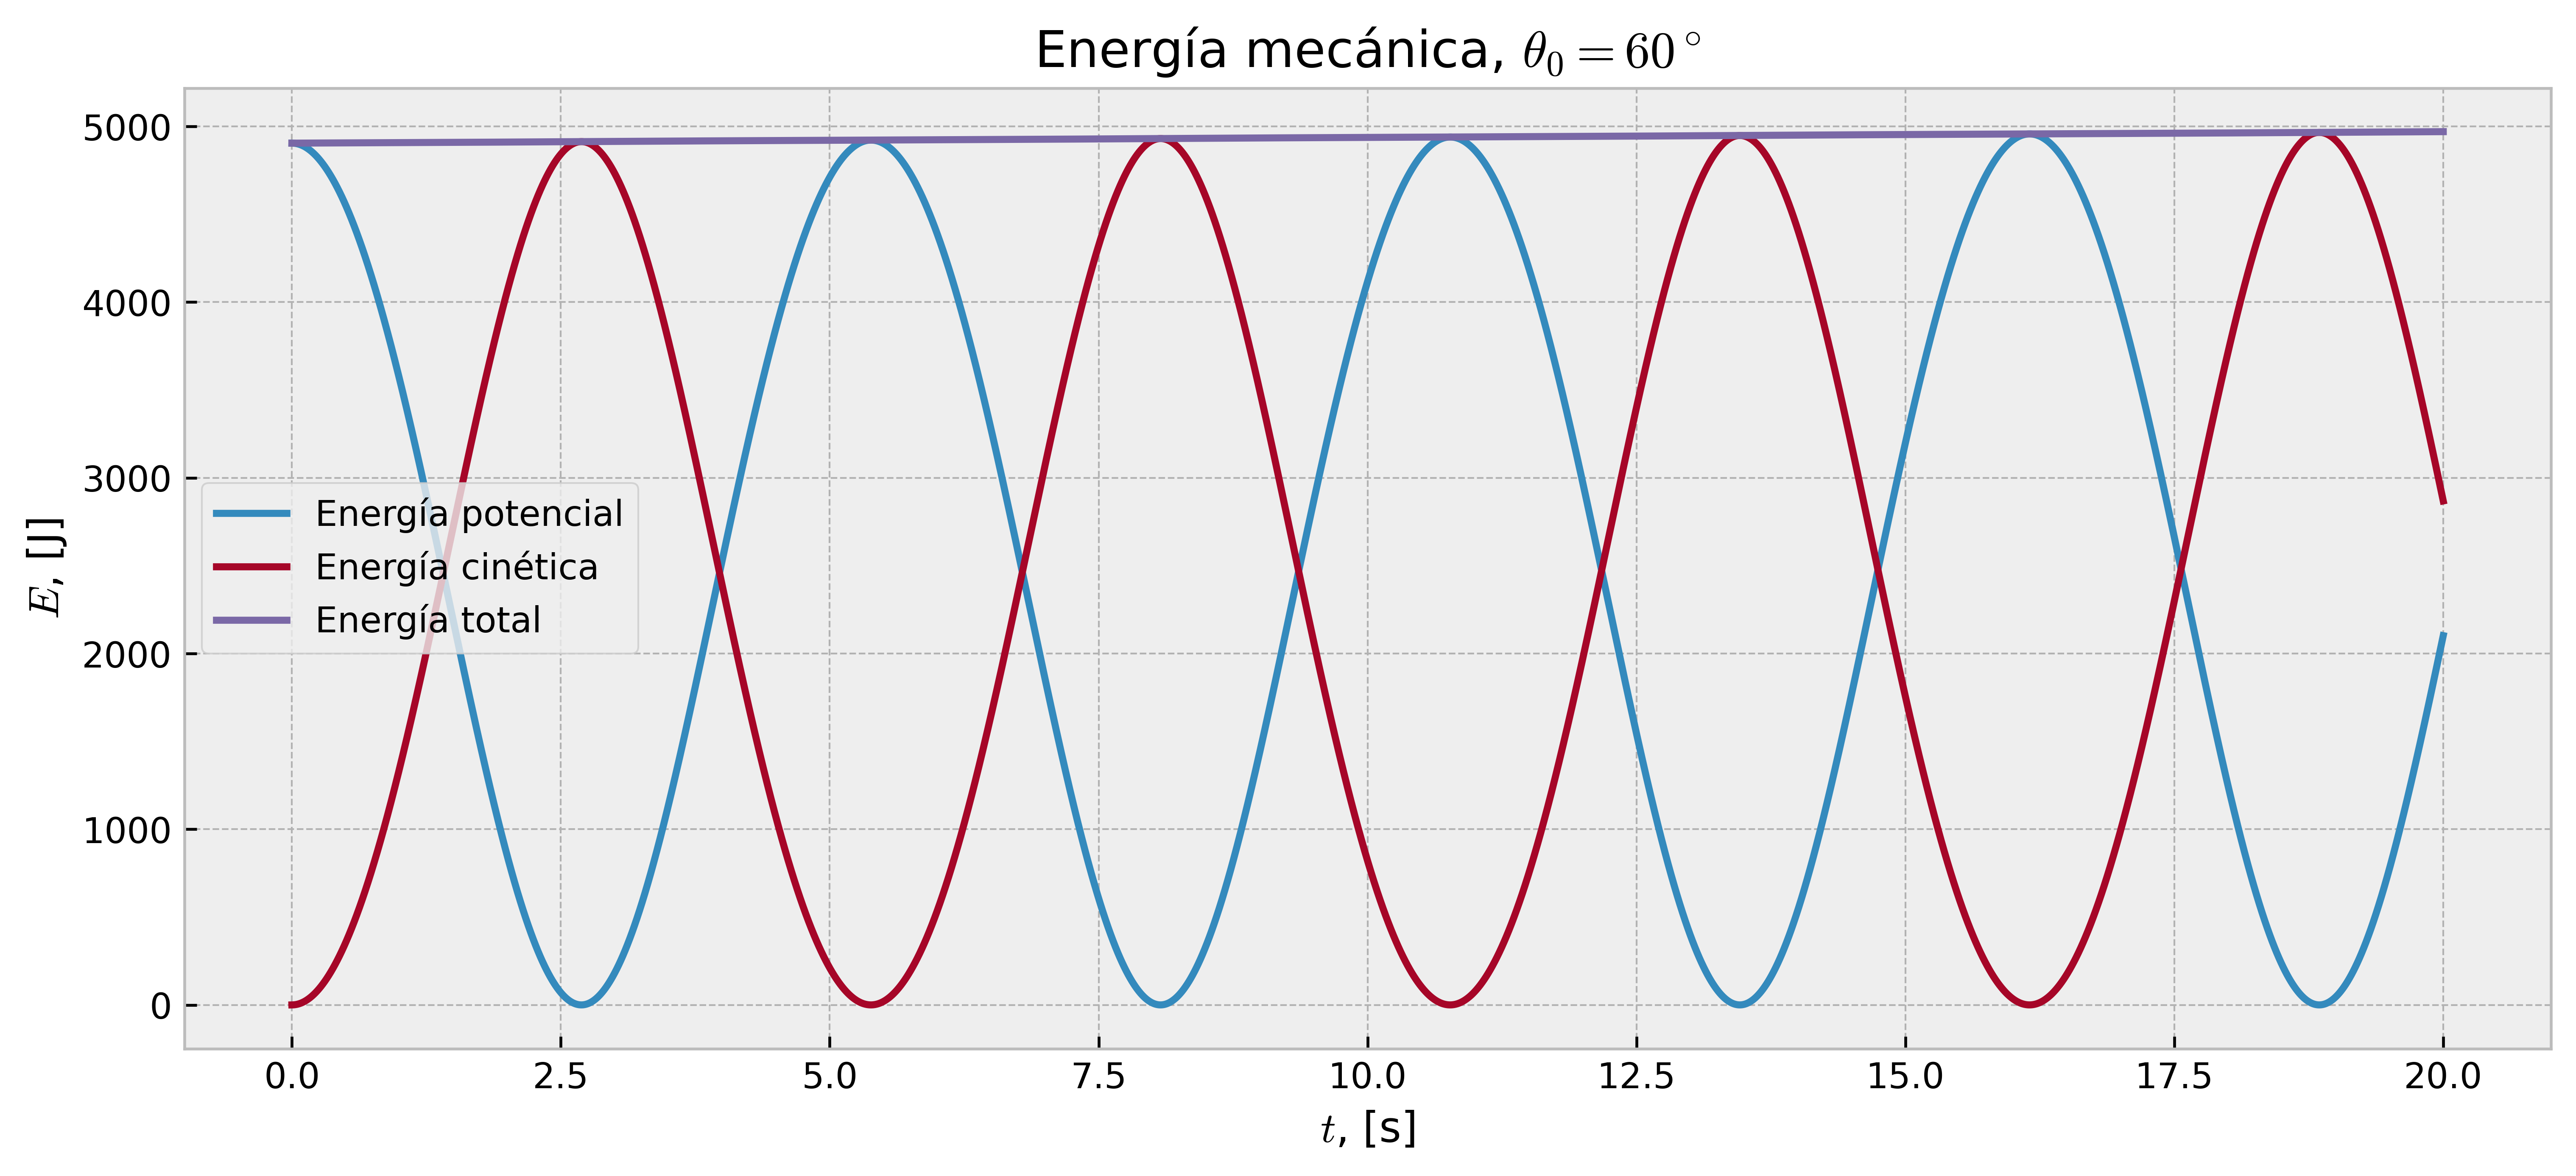

In [ ]:
# sexta celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
# evalúa conservación para pi/3
plt.figure(figsize=figsize, dpi=dpi)
plt.title(r"Energía mecánica, $\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, get_U(theta2), label=r"Energía potencial")
plt.plot(t, get_K(w2), label=r"Energía cinética")
plt.plot(t, get_U(theta2) + get_K(w2), label=r"Energía total")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$E$, [J]")
plt.legend(loc=0)  #0 mejor, 1 arriba izquierda
from google.colab import files
plt.savefig("penduloeuler01energ.png")
files.download("penduloeuler01energ.png") 
plt.show()

In [ ]:
# 7ma celda de mi primer cuaderno Colab
# Curso de F2, 2do cuatrimestre virtual 2020
def get_error(theta, w):
    """ Chequea error relativo en E=cte """
    E0 = get_U(theta[0]) + get_K(w[0])
    E1 = get_U(theta[-1]) + get_K(w[-1])
    return np.abs((E0 - E1)/E0)

print("Cambio relativo en E:")
print("Theta = %.0f: %.2e"%(theta01*180/np.pi, get_error(theta1, w1)))
print("Theta = %.0f: %.2e"%(theta02*180/np.pi, get_error(theta2, w2)))

Cambio relativo en E:
Theta = 15: 1.56e-02
Theta = 60: 1.33e-02
